In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

In [2]:
#AF_和nonAF_的源数据
AF_data_frame=pd.read_excel('RR_seg_AF.xls',sheet_name='Sheet1')
nonAF_data_frame=pd.read_excel('RR_seg_nonAF.xls',sheet_name='Sheet1')
AF_data=AF_data_frame.to_numpy()
nonAF_data=nonAF_data_frame.to_numpy()
print(AF_data.shape,nonAF_data.shape)

(17246, 30) (23236, 30)


In [3]:
###最新的特种工程，特征属性加到十列，样本的属性有均值，标准差，最小值，最大值，范围，中值，方差，熵
AF_input=np.empty([AF_data.shape[0],8])
AF_input[:,0]=np.mean(AF_data,axis=1)#均值
AF_input[:,1]=np.std(AF_data,axis=1)#标准差
AF_input[:,2]=np.amin(AF_data,axis=1)#最小值
AF_input[:,3]=np.amax(AF_data,axis=1)#最大值
AF_input[:,4]=np.ptp(AF_data,axis=1)#范围
AF_input[:,5]=np.median(AF_data,axis=1)#中值
AF_input[:,6]=np.var(AF_data,axis=1)#方差
AF_input[:,7]=np.log(2*math.pi*math.e*np.var(AF_data,axis=1))#熵

nonAF_input=np.empty([nonAF_data.shape[0],8])
nonAF_input[:,0]=np.mean(nonAF_data,axis=1)#均值
nonAF_input[:,1]=np.std(nonAF_data,axis=1)#标准差
nonAF_input[:,2]=np.amin(nonAF_data,axis=1)#最小值
nonAF_input[:,3]=np.amax(nonAF_data,axis=1)#最大值
nonAF_input[:,4]=np.ptp(nonAF_data,axis=1)#范围
nonAF_input[:,5]=np.median(nonAF_data,axis=1)#中值
nonAF_input[:,6]=np.var(nonAF_data,axis=1)#方差
nonAF_input[:,7]=np.log(2*math.pi*math.e*np.var(nonAF_data,axis=1))#熵
print(AF_input,nonAF_input)

[[1.83000000e+02 3.38368635e+01 1.28000000e+02 ... 1.86500000e+02
  1.14493333e+03 9.88097876e+00]
 [1.99066667e+02 4.55015995e+01 1.33000000e+02 ... 1.93500000e+02
  2.07039556e+03 1.04733720e+01]
 [2.07833333e+02 4.44672789e+01 1.37000000e+02 ... 2.12000000e+02
  1.97733889e+03 1.04273843e+01]
 ...
 [1.39333333e+02 1.47552326e+02 5.10000000e+01 ... 1.03000000e+02
  2.17716889e+04 1.28262428e+01]
 [8.41333333e+01 2.80722085e+01 5.00000000e+01 ... 7.40000000e+01
  7.88048889e+02 9.50743720e+00]
 [9.31000000e+01 3.85749055e+01 5.50000000e+01 ... 7.75000000e+01
  1.48802333e+03 1.01430810e+01]] [[ 281.3           9.60607447  261.         ...  281.5
    92.27666667    7.36266838]
 [ 281.56666667    7.45512501  272.         ...  278.5
    55.57888889    6.8556805 ]
 [ 279.63333333    6.05796079  268.         ...  279.5
    36.69888889    6.44062355]
 ...
 [ 308.73333333   46.82800681  161.         ...  294.5
  2192.86222222   10.53083999]
 [ 237.8          33.21184528  157.         ...  23

(500,)
(500,)


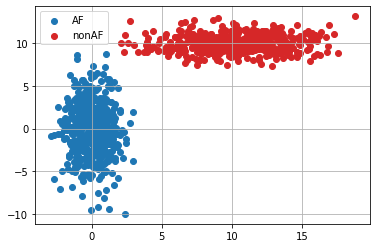

In [14]:
import numpy as np
import matplotlib.pyplot as plt
n=500
mean1= [0,0]
covl = [[1,0],[0,10]]
data1= np.random.multivariate_normal(mean1,cov1,n)
print(datal[:,0].shape)

mean2= [10,10]
cov2= [[10,0],[0,1]]
data2=np.random.multivariate_normal(mean2,cov2,n)
print(data2[:,0].shape)

color1 ='tab:blue'
color2 ='tab:red'
fig,ax = plt.subplots ()
ax.scatter(data1[:,0],data1[:,1],c=color1,label="AF")
ax.scatter(data2[:,0],data2[:,1],c=color2,label="nonAF")
ax.legend()
ax.grid(True)
plt.show()

<Figure size 3600x2400 with 0 Axes>

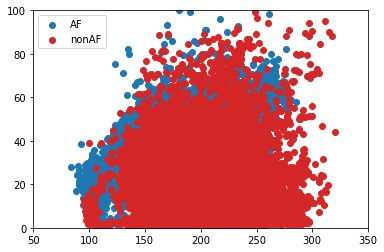

In [31]:
plt.figure(figsize=(15,10),dpi=240)
color1='tab:blue'
color2='tab:red'
fig,ax=plt.subplots()
x1=[AF_input[:,0]]
x2=[nonAF_input[:,1]]
ax.scatter(AF_input[:,0],AF_input[:,1],c=color1,label="AF")
ax.scatter(nonAF_input[:,0],nonAF_input[:,1],c=color2,label="nonAF")
plt.xlim([50,350])
plt.ylim([0,100])
plt.legend()
plt.show()

Text(0, 0.5, 'std')

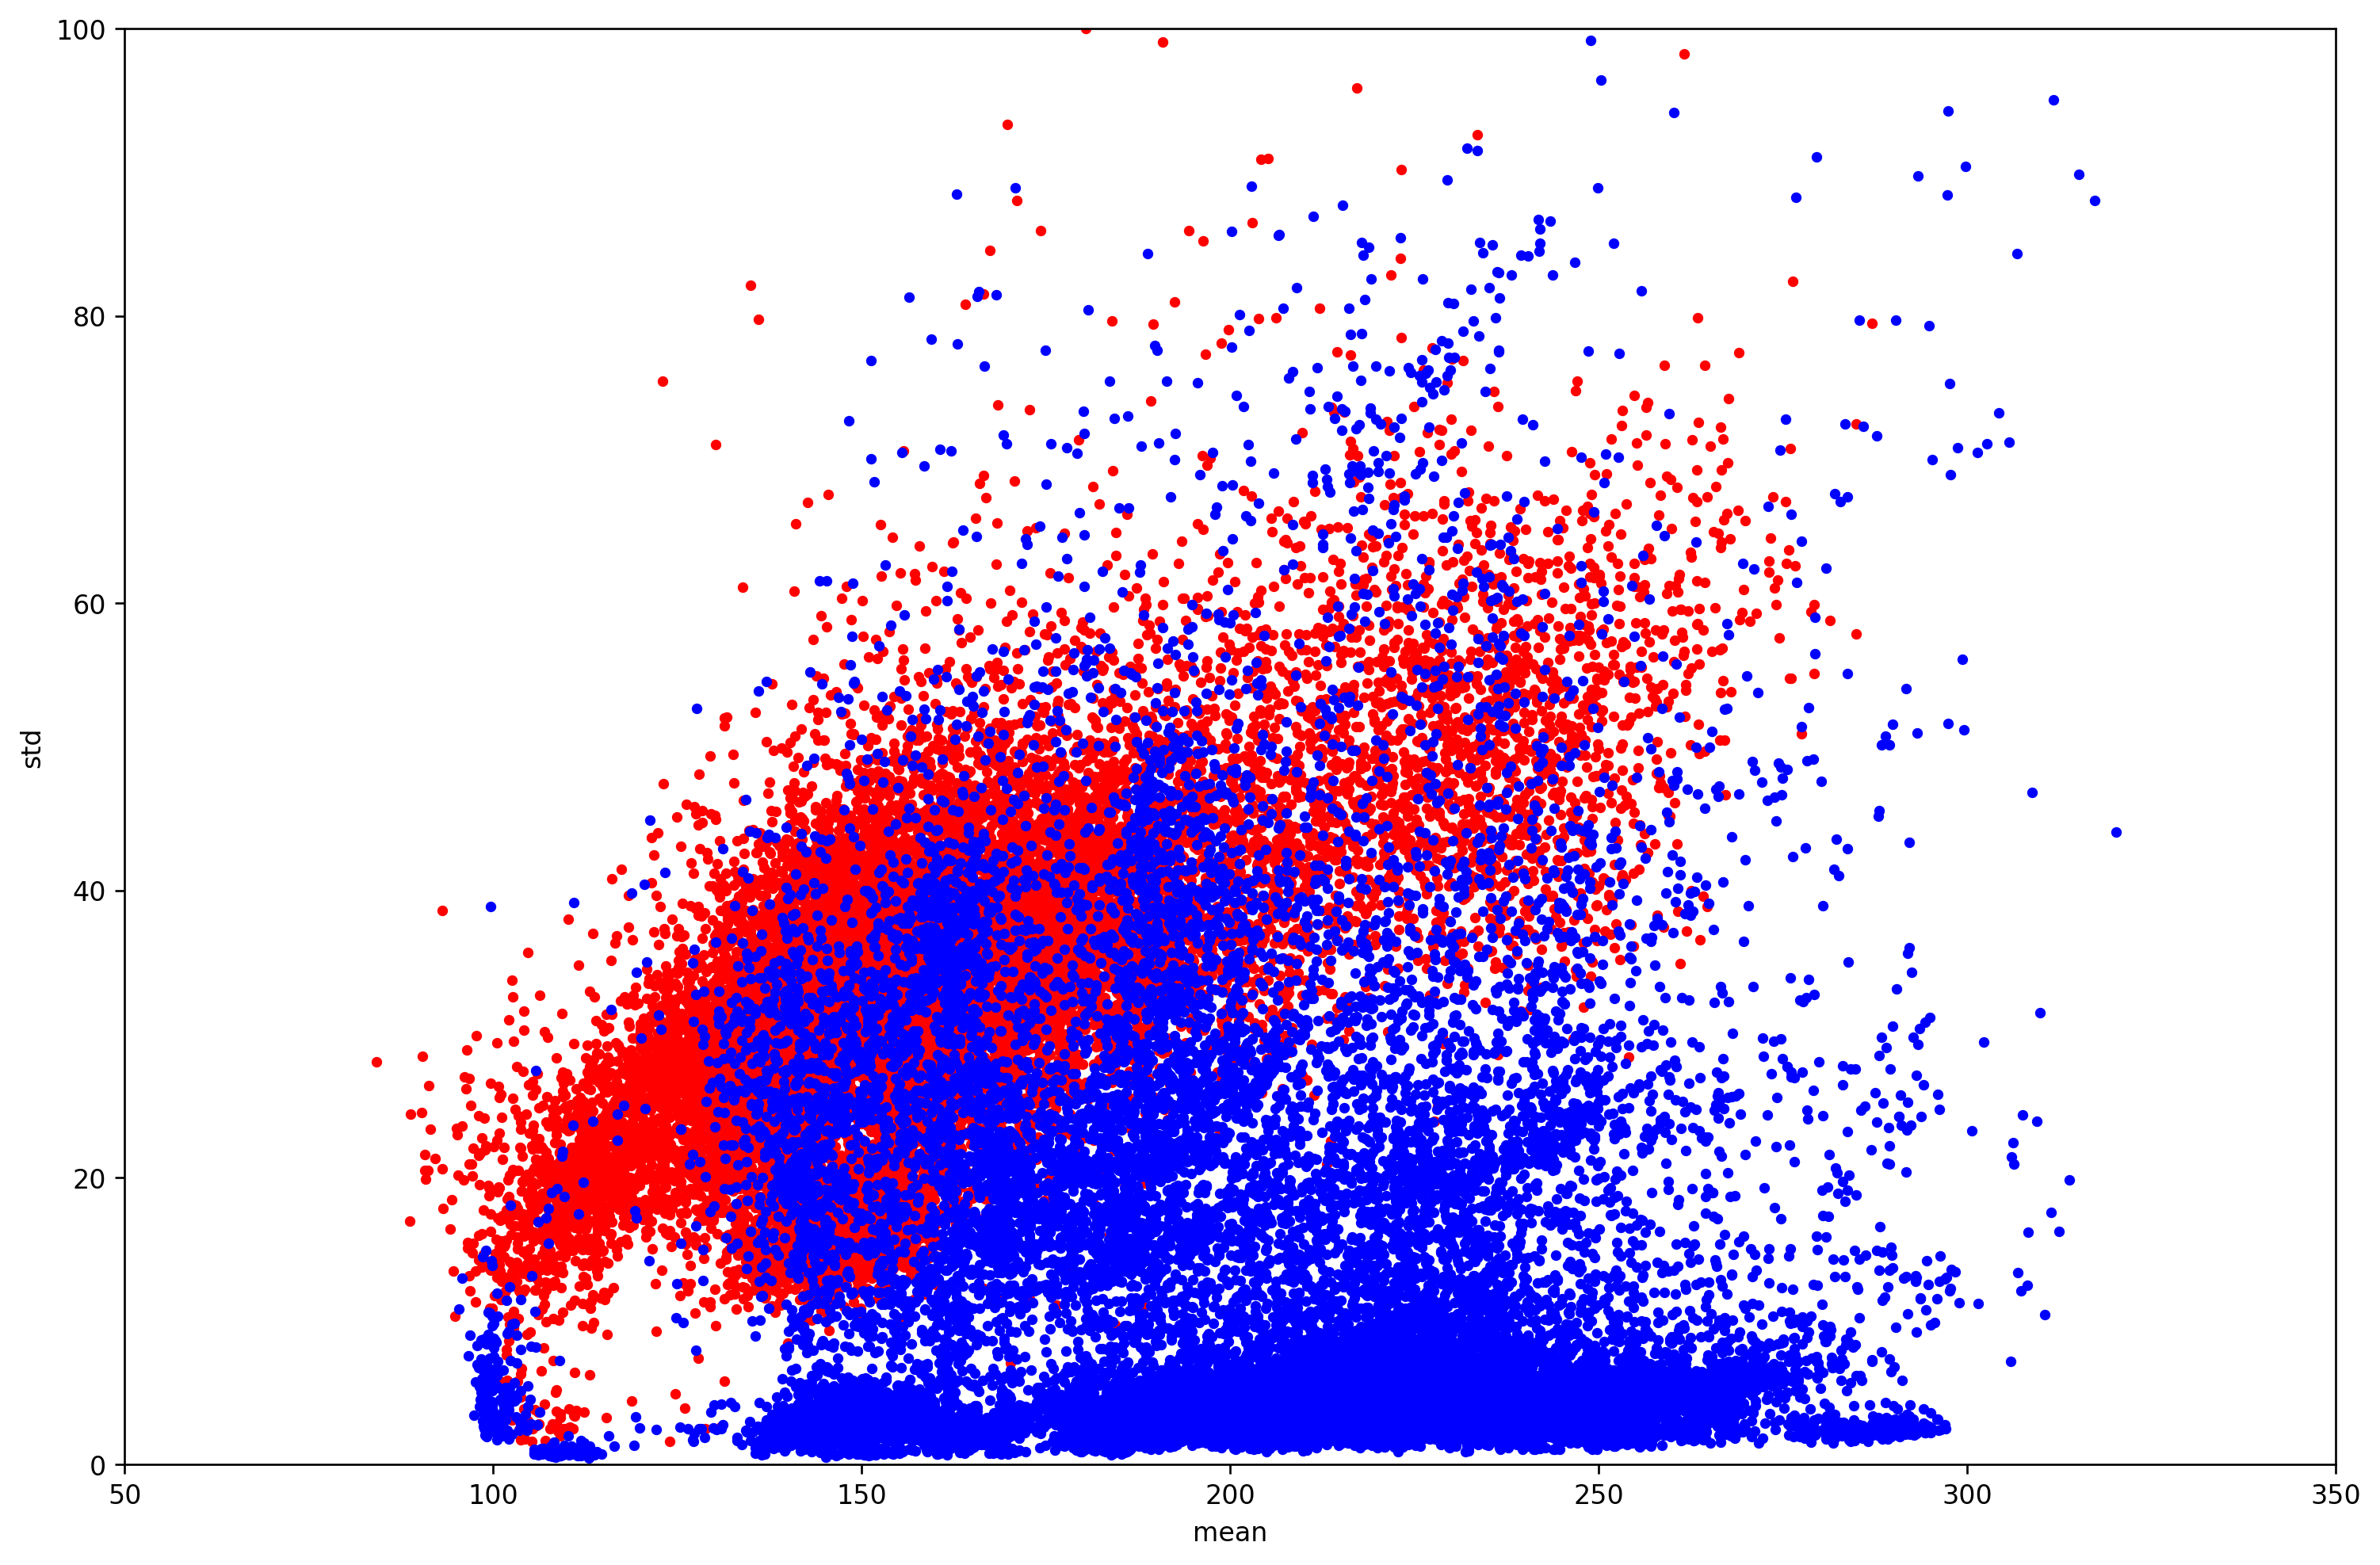

In [32]:
plt.figure(figsize=(15,10),dpi=240)
plt.plot(AF_input[:,0],AF_input[:,1],'.r')#参数‘.r'使之变成了点集
plt.plot(nonAF_input[:,0],nonAF_input[:,1],'.b')
plt.xlim([50,350])
plt.xlabel('mean')
plt.ylim([0,100])
plt.ylabel('std')


In [33]:
AF_label=np.ones(AF_input.shape[0])
nonAF_label=np.zeros(nonAF_input.shape[0])
print(AF_label.shape,nonAF_label.shape)

(17246,) (23236,)


In [25]:
#由numpy的ndarry格式转换为pandas的data_frame格式，用于存储
AF_input_frame=pd.DataFrame(AF_input)
nonAF_input_frame=pd.DataFrame(nonAF_input)
AF_label_frame=pd.DataFrame(AF_label)
nonAF_label_frame=pd.DataFrame(nonAF_label)

#使用with上下文管理器进行文件处理
with pd.ExcelWriter('pre_treatment_data.xlsx')as f:
    #header=False表示无列标签，index=False表示无行标签
    AF_input_frame.to_excel(f,sheet_name='AF_input',header=False,index=False)
    nonAF_input_frame.to_excel(f,sheet_name='nonAF_input',header=False,index=False)
    AF_label_frame.to_excel(f,sheet_name='AF_label',header=False,index=False)
    nonAF_label_frame.to_excel(f,sheet_name='nonAF_label',header=False,index=False)